In [46]:
#!pip install keras
#!pip install tensorflow==2.2

In [47]:
#!pip install pystan~=2.14
#!pip install fbprophet

In [96]:
# Importing the main packages for data analysis
import pandas as pd
import datetime
import numpy as np

In [97]:
# Read CSV database of Chilean Bank multiple Indexes and Precipitation Statistics
df_ppt = pd.read_csv("precipitaciones.csv")
df_bcn = pd.read_csv("banco_central.csv", thousands='.')

# Duplicates drop in both dataframes
df_bcn.drop_duplicates(keep = "first", inplace = True)
df_ppt.drop_duplicates(keep = "first", inplace = True)

# Keeping just Year-Month-Day in the date column
df_bcn['Periodo'] = df_bcn['Periodo'].astype(str).str[:10]

# Eliminate a very wrong row that has a month that does not even exist 
df_bcn = df_bcn[df_bcn["Periodo"]!="2020-13-01"]

# Create a Datetime column, which will be used as index, Sorting Dataframes by dates
df_bcn["Periodo"] = pd.to_datetime(df_bcn["Periodo"], format="%Y-%m-%d")
df_bcn = df_bcn.sort_values(by="Periodo")

df_ppt["date"] = pd.to_datetime(df_ppt["date"], format="%Y-%m-%d")
df_ppt = df_ppt.sort_values(by="date")

# Data curation and dropping NaN rows in the Precipitation Dataframe
df_bcn = df_bcn.replace("a", np.nan)
df_ppt.dropna(axis=0, how='any', inplace=True)

In [98]:
# Converting string numbers to numeric format. The original format was xxx.xxx.xxx for millions.
def replace(value):
    if type(value) == str:
        return value.replace('.', '')
    else:
        return value
        
df_bcn = df_bcn.applymap(replace)

In [99]:
# Numeric convertion of string values in Dataframe
periodo = df_bcn["Periodo"].tolist()
df_bcn = df_bcn.drop(columns=["Periodo"]).apply(pd.to_numeric, errors='ignore')

# There are some anomalies in the different index columns of the Central Bank Dataframe
# Median Filter is applied to every columns with a 3 element window, to smooth the presence
# of noise in the different time series. Median filter is more stable than Mean filter
df_bcn = df_bcn.rolling(window=3).apply(np.median)

In [100]:
df_bcn.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
count,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,2.960000e+02,9.100000e+01,...,4.160000e+02,1.400000e+02,3.680000e+02,8.000000e+01,3.560000e+02,2.600000e+02,8.000000e+01,8.000000e+01,8.000000e+01,141.000000
mean,5.398256e+08,6.559150e+08,6.855010e+08,6.504554e+08,5.667392e+08,4.703494e+08,4.689618e+08,5.201449e+08,5.031018e+08,3.235209e+08,...,6.536428e+08,6.202585e+08,6.604453e+08,1.689475e+08,6.104903e+08,4.230056e+08,3.025236e+08,3.114646e+08,3.558315e+08,26403.624113
std,2.986636e+08,3.080185e+08,3.495445e+08,3.139641e+08,2.925174e+08,2.719342e+08,2.855553e+08,3.041770e+08,2.952015e+08,1.551017e+08,...,3.756653e+08,4.056129e+08,2.882233e+08,2.329324e+08,3.120143e+08,1.767189e+08,3.528527e+08,3.638750e+08,3.679441e+08,6719.216209
min,6.474646e+07,8.696327e+07,9.588208e+07,1.071085e+07,1.028194e+07,3.914745e+07,1.058812e+07,1.065150e+07,4.774487e+07,5.505933e+07,...,7.662271e+07,1.009822e+08,1.097628e+07,1.100801e+07,6.354050e+07,6.310000e+03,1.009939e+08,1.055055e+07,1.039010e+07,6703.000000
25%,1.139813e+08,6.513731e+08,1.130605e+08,6.377448e+08,4.641848e+08,2.849367e+08,1.141303e+08,1.106823e+08,1.142172e+08,1.921549e+08,...,1.102096e+08,1.041898e+08,3.871916e+08,1.033536e+08,5.189141e+08,3.480761e+08,1.039158e+08,1.033080e+08,1.168002e+08,23636.000000
50%,5.843265e+08,7.697695e+08,8.762564e+08,7.553421e+08,6.386332e+08,4.360802e+08,4.954918e+08,5.889480e+08,5.364705e+08,2.848215e+08,...,8.845239e+08,9.022522e+08,7.790195e+08,1.058928e+08,6.900402e+08,4.622889e+08,1.094342e+08,1.060189e+08,1.322355e+08,27308.000000
75%,7.867147e+08,8.782820e+08,9.303687e+08,8.807220e+08,8.093101e+08,6.629747e+08,7.101759e+08,7.793996e+08,7.572947e+08,3.847607e+08,...,9.332443e+08,9.518755e+08,9.034062e+08,1.087373e+08,8.772306e+08,5.583363e+08,1.236101e+08,2.957986e+08,8.493913e+08,31474.000000
max,9.930899e+08,9.939599e+08,9.966763e+08,9.948849e+08,9.599783e+08,9.855646e+08,9.593122e+08,9.900045e+08,9.889148e+08,6.338361e+08,...,9.906842e+08,9.907011e+08,9.901984e+08,9.920492e+08,9.914427e+08,6.545170e+08,9.988923e+08,9.901438e+08,9.717798e+08,38729.000000


In [101]:
df_ppt.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


We have realize that time period of both dataframes is different, there are many gaps in the time series of Central Bank Dataframe. Besides, before the Median Filter application, there were plenty inconsistencies in the columns. Probably, some typing mistake because does not make sense that between one year and another, indexes drop an order of magnitude.

In [103]:
df_bcn["Periodo"] = periodo

In [104]:
import matplotlib.pyplot as plt

# Precipitation plot display, Inputs: region, start_date and end_date in the format YY-mm-dd
def visualizacion_ppt(region, start_date, end_date):
    columns = df_ppt.columns[1:]
    min_date, max_date = df_ppt["date"].min(), df_ppt["date"].max()
    s_date, e_date = pd.Timestamp(start_date), pd.Timestamp(end_date)
    if (min_date <= s_date)&(max_date >= e_date):
        indices = (df_ppt["date"] >= start_date) & (df_ppt["date"] <= end_date)
        df = df_ppt.loc[indices]
        if region in columns:
            df = df[["date", region]]
            df.set_index('date').plot()
        else:
            print("Region no existe. La lista de opciones disponibles son : ", ", ".join(columns))
    else:
        print("Las fechas elegidas deben estar entre: ", min_date, "y", max_date)

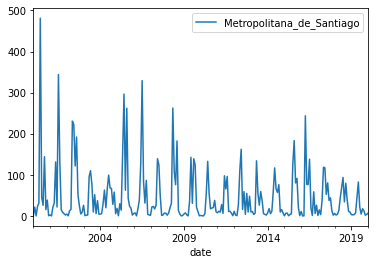

In [105]:
visualizacion_ppt("Metropolitana_de_Santiago", "2000-01-01",  "2020-01-01")

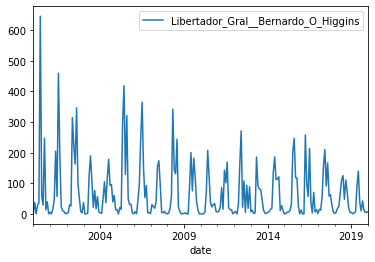

In [106]:
visualizacion_ppt("Libertador_Gral__Bernardo_O_Higgins", "2000-01-01",  "2020-01-01")

There is a decresing tendency in the timeseries and also it is seasonality with a peak in the Winter season. The decreasing tendency might be explained due to the impact of climate change in the central region of Chile

In [108]:

# Multiple seasons precipitation plot display. Input variables are region and a list with the years you want to display.
def visualizacion_multi_ppt(region, years):
    columns = df_ppt.columns[1:]
    
    if region in columns:
        df = df_ppt[["date", region]]
        df["year"] = df["date"].dt.year
        df["month"] = df["date"].dt.month
        df = df[df["year"].isin(years)]
        df = df.set_index('month')
        df.groupby('year')[region].plot(legend='True')
        plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


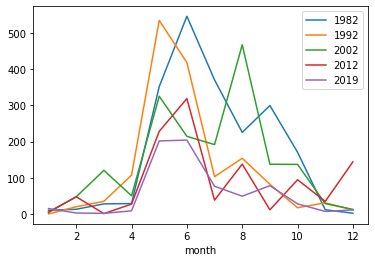

In [109]:
visualizacion_multi_ppt("Maule", [1982, 1992, 2002, 2012, 2019])

There is a decreasing tendency in the monthly accumulated precipitation from 1982-2019. Climate change is affecting the weather
and precipitation over the past decades

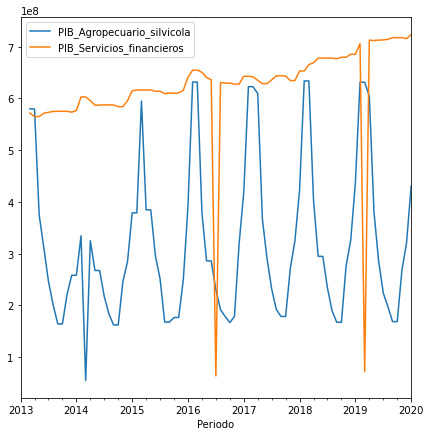

In [110]:

# PIB activities comparison plot display between two dates. Input variables are the PIB activities, start date and end date.
def visualizacion_pib(pib_1, pib_2, start_date, end_date):
    columns = df_bcn.columns[1:]
    min_date, max_date = df_bcn["Periodo"].min(), df_bcn["Periodo"].max()
    s_date, e_date = pd.Timestamp(start_date), pd.Timestamp(end_date)
    if (min_date <= s_date)&(max_date >= e_date):
        indices = (df_bcn["Periodo"] >= start_date) & (df_bcn["Periodo"] <= end_date)
        df = df_bcn.loc[indices]
        if (pib_1 in columns)&(pib_1 in columns):
            df = df[["Periodo", pib_1, pib_2]]
            df = df.set_index('Periodo')
            df[[pib_1, pib_2]].plot(figsize=(7,7))
        else:
            print("Actividad no existe. La lista de opciones disponibles son : ", ", ".join(columns))
    else:
        print("Las fechas elegidas deben estar entre: ", min_date, "y", max_date)


visualizacion_pib('PIB_Agropecuario_silvicola', 'PIB_Servicios_financieros', "2013-01-01", "2020-01-01")

The timeseries were previously smoothed for a better visualization and also reducing the noisy values
Agriculure- forestry activites increases during Spring-Summer seasons. It is the harvest season, while the rest
of the year is the growing season and there is less activity. On the other hand, Financial Services activites stay quite
stable during the most part of the year

In [111]:
# Reading the Milk Price CSV file and converting month to numbers with a dictionary
df_mlk = pd.read_csv("precio_leche.csv")
mes_dict = {'Ene': 1, 'Feb':2, 'Mar':3, 'Abr':4, 'May':5, 'Jun':6, 'Jul':7, 'Ago':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dic':12}
df_mlk['Mes'] = df_mlk['Mes'].replace(mes_dict)

In [112]:
# Create a Datatime column and setting it as the index
df_mlk['Fecha'] = df_mlk['Anio'].astype(str).str.zfill(4) + "-" + df_mlk['Mes'].astype(str).str.zfill(2) + "-01"
df_mlk['Fecha'] = pd.to_datetime(df_mlk['Fecha'], format="%Y-%m-%d")
df_mlk = df_mlk.set_index('Fecha')

<AxesSubplot:xlabel='Fecha'>

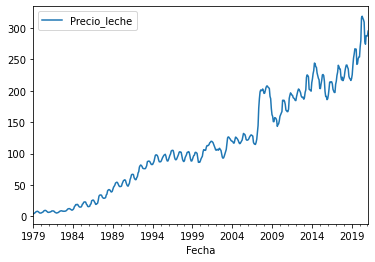

In [113]:
# Plotting the milk price time serie
mlk_serie = df_mlk
mlk_serie.drop(columns=["Mes", "Anio"]).plot()
# The timeserie has seasonality and an increasing tendency. As everything in this country.

In [116]:
# Build some extra variables for the year and month in both Precipitation and Central Bank DF
df_ppt["year"] = df_ppt["date"].dt.year
df_ppt["month"] = df_ppt["date"].dt.month

In [117]:
df_bcn["Anio"] = df_bcn['Periodo'].dt.year
df_bcn["Mes"] = df_bcn['Periodo'].dt.month

In [118]:
# Merge Precipitation and Milk DFs first by two keys YY-MM
df_total = pd.merge(df_ppt, df_mlk,  how='left', left_on=['year','month'], right_on = ['Anio','Mes'])

In [119]:
df_total = df_total.sort_values(by="date")
df_ppt_mlk = df_total

In [120]:
# Drop duplicated columns, because we already have "year", "month"
df_total.drop(columns=["Anio", "Mes"], inplace=True)

In [121]:
# Merge the Milk-Precipitation DF with the Centrl Bank DF, again repeting the same keys
df_total = pd.merge(df_total, df_bcn,  how='left', left_on=['year','month'], right_on = ['Anio','Mes'])

In [122]:
# Set Datetime column as Index of the Merged Dataframe and drop the repeated columns
df_total = df_total.set_index('date')
df_total.drop(columns=["Anio", "Mes"], inplace=True)

In [123]:
# We select some columns that might be correlated to the Milk Price
# Some sort of Expert Knowledge filtering

df_total = df_total[['Coquimbo',
 'Valparaiso',
 'Metropolitana_de_Santiago',
 'Libertador_Gral__Bernardo_O_Higgins',
 'Maule',
 'Biobio',
 'La_Araucania',
 'Los_Rios',
 'Precio_leche',
 'PIB_Agropecuario_silvicola',
 'PIB_Alimentos',
 'PIB_Electricidad',
 'PIB_Transporte',
 'PIB_Servicios_financieros',
 'Impuesto_al_valor_agregado',
 'PIB',
 'Precio_de_la_gasolina_en_EEUU_dolaresm3',
 'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas',
 'Precio_del_petroleo_Brent_dolaresbarril',
 'Precio_del_kerosene_dolaresm3',
 'Precio_del_petroleo_WTI_dolaresbarril',
 'Precio_del_propano_centavos_de_dolargalon_DTN',
 'Tipo_de_cambio_del_dolar_observado_diario',
 'Ocupacion_en_Agricultura_INE',
 'Indice_de_produccion_industrial',
 'Indice_de_produccion_industrial_electricidad__gas_y_agua',
 'Indice_de_produccion_industrial__manufacturera',
 'Generacion_de_energia_electrica_CDEC_GWh']]

In [124]:
# Move predicted column to the first position in the Dataframe
df_total = df_total[ ['Precio_leche'] + [ col for col in df_total.columns if col != 'Precio_leche' ] ]

In [125]:
# To estimate correlation between Timeseries, we implement Crosscorrelation.
# There might be lags in the correlationg between some columns and the milk price
# That is the reason why common correlation is not useful for timeseries. It won't
# deliver any insight if Timeseries do not share the same time aligment

def crosscorr(datax, datay, lag=0):
    return datax.corr(datay.shift(lag))

# Compute crosscorrelation between the selected columns and set a max lag window of 6 periods to compute
d_price = df_total['Precio_leche']
columns = df_total.columns.tolist()[1:]
window = 6
lags = np.arange(0, (window), 1)  # contrained

dictionary = {}

# Save the maximum absolute cross correlation value, and the number of lags in a dictionary
for col in columns:
    d_aux = df_total[col]
    rs = np.nan_to_num([crosscorr(d_price, d_aux, lag) for lag in lags])
    dictionary[col] = [np.max(np.abs(rs)), np.argmax(np.abs(rs))]

Print the dictionary and we can discover which variables are truly correlated to the Milk Price and whick are not
Remember that correlation can be possitive or negative, but the module is the strenght of the correlation.
Besides, there is an average of 5 lags for the max correlation between precipitation and milk price.
It is important because rain accumulation is correlated to milk production and influences the price.
Also, Electricity generation and Gasoline price also affect the cost of the milk


In [126]:
dictionary

{'Coquimbo': [0.10465842585265213, 5],
 'Valparaiso': [0.13216855118909202, 5],
 'Metropolitana_de_Santiago': [0.14782080209635, 5],
 'Libertador_Gral__Bernardo_O_Higgins': [0.1477449787021283, 5],
 'Maule': [0.1387402866987637, 5],
 'Biobio': [0.12121887537625033, 5],
 'La_Araucania': [0.09745033540745723, 5],
 'Los_Rios': [0.07928924304465565, 5],
 'PIB_Agropecuario_silvicola': [0.42246611066706535, 2],
 'PIB_Alimentos': [0.2588702738511037, 1],
 'PIB_Electricidad': [0.15781058360601505, 5],
 'PIB_Transporte': [0.31411485165533787, 2],
 'PIB_Servicios_financieros': [0.30672552684036136, 0],
 'Impuesto_al_valor_agregado': [0.5989037712084899, 5],
 'PIB': [0.2438484558537414, 3],
 'Precio_de_la_gasolina_en_EEUU_dolaresm3': [0.7619874157268203, 5],
 'Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas': [0.23885813718975007,
  3],
 'Precio_del_petroleo_Brent_dolaresbarril': [0.4952327069983812, 3],
 'Precio_del_kerosene_dolaresm3': [0.4355802943280749, 1],
 'Precio_del_

In [127]:
df_total.fillna(0, inplace=True)

First approach to the forecast price problem is a LSTM Neural Network.
We set the delay expectation in 5, according to the max crosscorrelation between variables
Besides, it is not neccesary to add new variables to the dataset, such as precipitation accumulation
Deep Learning approach will generate those variables if the optimization process aims to generate it
Good features will be build by the Network in the intermediate layers

(70, 1, 139) (70,) (13, 1, 139) (13,)
Epoch 1/50
7/7 [==============================] - 1s 88ms/step - loss: 0.7685 - val_loss: 5.7586e-04
Epoch 2/50
7/7 [==============================] - 0s 7ms/step - loss: 0.7197 - val_loss: 0.0033
Epoch 3/50
7/7 [==============================] - 0s 7ms/step - loss: 0.6467 - val_loss: 0.0125
Epoch 4/50
7/7 [==============================] - 0s 7ms/step - loss: 0.5300 - val_loss: 0.0448
Epoch 5/50
7/7 [==============================] - 0s 7ms/step - loss: 0.3493 - val_loss: 0.1588
Epoch 6/50
7/7 [==============================] - 0s 7ms/step - loss: 0.1278 - val_loss: 0.5663
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0619 - val_loss: 0.9617
Epoch 8/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0704 - val_loss: 0.6248
Epoch 9/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0548 - val_loss: 0.5114
Epoch 10/50
7/7 [==============================] - 0s 7ms/step - loss: 0.0519 - val_loss: 0.6

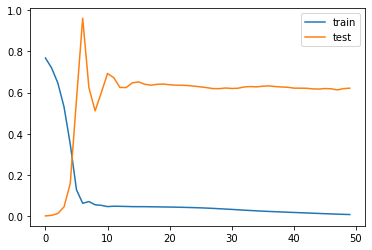

In [158]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
df_lstm = df_total[df_total.index >="2013-01-01"] 
values = df_lstm.values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 5, 0)
 
# split into train and test sets
values = reframed.values
n_train_hours = int(0.8*len(df_lstm.index))
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(25, return_sequences=True, activation='relu'))
model.add(LSTM(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=10, validation_data=(test_X, test_y), shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Training stage shows that the LSTM model is overfitting, there is a decrease in the loss of the training dataset, while the test loss just runs stable during a 100 epochs. The trainig/testing set was splited 80/20, but the main problem is that between 2013-2020, there are barely 84 samples to train. This is not enought to build a Deep Learning approach to the problem.

Our second approach will be to use a state of the art model for Time Series forecast called Prophet, created by Facebook in 2017. Prophet has been built to internalize seasonality and tendency in time series, which is perfect for our dataset.
The first approach would be to build a Month seasonality model, trained with just the whole Milk Price Timeserie starting in 1970-2016. Then testing in the time period between 2017-2020. This time lapse will be the shared for every experiment with different time lapses length. Time series cross validation does not work like regular cross validation. It makes no sense that the training dataset is ahead from validation data in the time line. Cross Validation in Timeseries is composed of a training stage until a datetime and then forecasting the next 30 days time horizon. Repeating the procedure in a fixed period, 30 days in this case. No exogenous variables added, just the Milk Price time serie

In [132]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

# Prophet requires a "y" and "ds" columns, with the target time serie and the datetime
mlk_serie.rename(columns={"Precio_leche": "y"}, inplace=True)
mlk_serie["ds"] = mlk_serie.index

# Build a Monthly seasonality model and fit the serie
model = Prophet(seasonality_mode='multiplicative').fit(mlk_serie)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [139]:
from fbprophet.diagnostics import cross_validation

# To measure the performance of the model we have made 31 forecasts between 2017-2020. Samples are more recently, so they will reflect
# more robustness in the present days.

start_time = mlk_serie.index.min()
init_days = str((pd.Timestamp('2017-01-01') - start_time).days) + " days"

df_cv = cross_validation(model, initial=init_days, period='30 days', horizon='30 days',  parallel="threads")

INFO:fbprophet:Making 31 forecasts with cutoffs between 2016-01-29 00:00:00 and 2021-01-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.thread.ThreadPoolExecutor object at 0x7f798a1acd90>


In [140]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head(30)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,4 days,694.946265,26.361833,25.628815,0.124938,0.132372,0.000000
1,5 days,724.874970,26.923502,26.547470,0.127171,0.127920,0.000000
2,6 days,685.600183,26.183968,26.078066,0.124904,0.127920,0.000000
3,7 days,508.240070,22.544180,22.128600,0.108690,0.114419,0.000000
4,8 days,265.507924,16.294414,13.513488,0.067741,0.083732,0.333333
5,9 days,6.971809,2.640418,2.140243,0.009172,0.005071,1.000000
6,10 days,13.371235,3.656670,3.263204,0.013923,0.018114,1.000000
7,11 days,22.614287,4.755448,4.428704,0.019571,0.019324,1.000000
8,12 days,20.334802,4.509413,4.124354,0.018473,0.019324,1.000000
9,13 days,14.252935,3.775306,3.119679,0.014171,0.007931,1.000000


Forecast is a regression problem, different from classification. That is why accuracy/precision are not valid performance metrics here. In this case; MSE, RMSE, MAE are the best performance metrics to measure the differente between real milk price and forecasted price.

We decided to run a second test with Prophet Model. This time, we decided to add some exogenous variables added. The most correlated variables are added like regressors to the model. Time Series dataframe starts in 2013, due to the Central Bank measurement of indicators such as Electricity Generation and also PIB. There are less samples to fit than the previous model, but there are more variables entering to it. Test validation lapse is the same as before to make performance metrics coherent.

In [141]:
df_lstm.rename(columns={"Precio_leche": "y"}, inplace=True)
df_lstm["ds"] = df_lstm.index

model = Prophet(seasonality_mode='multiplicative')
model.add_regressor('Maule')
model.add_regressor('Biobio')
model.add_regressor('La_Araucania')
model.add_regressor('Los_Rios')
model.add_regressor('Generacion_de_energia_electrica_CDEC_GWh')
model.add_regressor('PIB_Agropecuario_silvicola')
model.add_regressor('Precio_del_petroleo_Brent_dolaresbarril')

model = model.fit(df_lstm)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [142]:
start_time = df_lstm.index.min()
init_days = str((pd.Timestamp('2017-01-01') - start_time).days) + " days"
df_cv = cross_validation(model, initial=init_days, period='30 days', horizon='30 days',  parallel="threads")

INFO:fbprophet:Making 39 forecasts with cutoffs between 2017-01-17 00:00:00 and 2020-03-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.thread.ThreadPoolExecutor object at 0x7f78e2988750>


In [143]:
df_p = performance_metrics(df_cv)
df_p.head(30)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,14 days,19.699414,4.438402,4.364020,0.018823,0.017889,0.666667
1,15 days,117.383775,10.834379,10.452312,0.045489,0.042247,0.000000
2,16 days,78.900601,8.882601,7.431799,0.032302,0.032849,0.333333
3,17 days,21.715128,4.659949,3.317875,0.014835,0.005928,0.666667
4,18 days,185.325400,13.613427,11.715467,0.052995,0.046727,0.333333
5,19 days,95.356175,9.765049,8.140657,0.035944,0.031357,0.333333
6,20 days,81.089832,9.004989,8.849616,0.037732,0.033684,0.000000
7,21 days,75.622853,8.696140,8.580724,0.036565,0.034233,0.000000
8,22 days,45.373488,6.735985,6.508895,0.028646,0.033142,0.333333
9,23 days,71.343289,8.446496,7.482843,0.032637,0.034442,0.333333


The prophet model is a continuous model, even if it has been trained on monthly date, is capable of delivering
daily forecast. Finally, we just add the precipitation metrics to the model as regressors. This timeserie starts on 1979, and the sample testing lapse principle will be applied this time.

In [144]:
df_ppt_mlk = df_ppt_mlk[df_ppt_mlk["date"] >= df_ppt["date"].min()]

In [145]:
df_ppt_mlk.rename(columns={'Precio_leche': 'y', 'date': 'ds'}, inplace=True)

In [146]:
model = Prophet(seasonality_mode='multiplicative')
model.add_regressor('Maule')
model.add_regressor('Libertador_Gral__Bernardo_O_Higgins')
model.add_regressor('Biobio')
model.add_regressor('La_Araucania')
model.add_regressor('Los_Rios')

model = model.fit(df_ppt_mlk)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [150]:
start_time = df_ppt_mlk["ds"].min()
init_days = str((pd.Timestamp('2017-01-01') - start_time).days) + " days"
df_cv = cross_validation(model, initial=init_days, period='30 days', horizon='30 days',  parallel="threads")

INFO:fbprophet:Making 39 forecasts with cutoffs between 2017-01-17 00:00:00 and 2020-03-02 00:00:00
INFO:fbprophet:Applying in parallel with <concurrent.futures.thread.ThreadPoolExecutor object at 0x7f78e2166190>


In [151]:
df_p = performance_metrics(df_cv)
df_p.head(30)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,14 days,4.095644,2.023770,1.699837,0.007209,0.007253,1.000000
1,15 days,28.873312,5.373389,4.451074,0.018829,0.026940,1.000000
2,16 days,26.590548,5.156602,4.531743,0.019220,0.026940,1.000000
3,17 days,39.722317,6.302564,6.160440,0.027538,0.027010,1.000000
4,18 days,1.779483,1.333972,1.197593,0.005447,0.005665,1.000000
5,19 days,12.933060,3.596256,2.582661,0.010818,0.004708,1.000000
6,20 days,68.910103,8.301211,6.895343,0.028853,0.041293,1.000000
7,21 days,114.871542,10.717814,9.390345,0.039637,0.043632,0.666667
8,22 days,127.927059,11.310484,10.871307,0.047775,0.051222,0.666667
9,23 days,45.099730,6.715633,6.703748,0.029798,0.028667,1.000000


In conclusion, the best model for the milk price forecast is the Prophet with both Central Bank and Precipitation exogenous variables. Those variables probably explain better the price of the milk in the past 3 years lapse. We decided to take a look at the rmse - 30 days metric to compare the results. If we change the validation time lapse, we might find that a different model is the most accurated one. Probably, if we had a larger time window with Central Bank indicators, it could be possible to achieve a better forecaster.

The milk price forecast could be useful to simulate the impact of climate change and global warming in the price of food worlwide. It is important to measure the potential impact of the climate change in carrying a food crisis in several regions around the world.

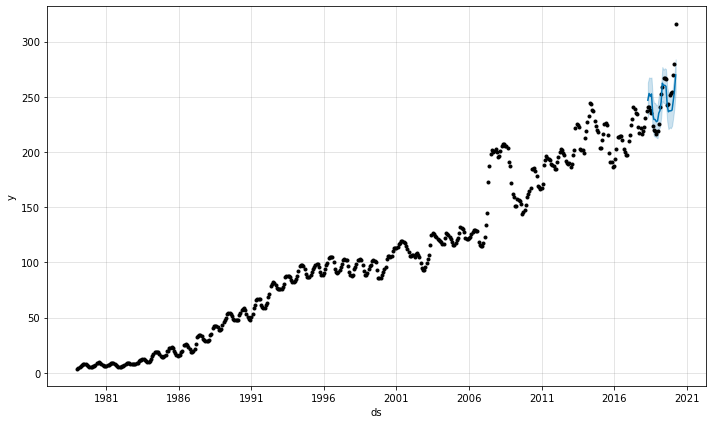

In [152]:
# Finally, we plot the two year prediction and compare it to real milk price

future = df_ppt_mlk.iloc[-24:]

forecast = model.predict(future)

fig = model.plot(forecast)